In [1]:
import os, sys
import numpy as np
import cv2
from xml.dom import minidom
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from tqdm import tqdm
%matplotlib notebook

# Params

In [3]:
filename = 'sn86058242-19200121'
#xmlname = 'sn87096040-19200122'

imgloc  = './data/images'
xmlloc  = './data/xmls'


# OCR Processing

In [4]:
# Read OCR xml and image
xmldoc = minidom.parse(os.path.join(xmlloc,filename+'.xml'))
img    = cv2.imread(os.path.join(imgloc,filename+'.jpg'))

In [43]:
# Get image dimension and resize factor
image_width  = int(xmldoc.getElementsByTagName('Page')[0].attributes['WIDTH'].value)
image_height = int(xmldoc.getElementsByTagName('Page')[0].attributes['HEIGHT'].value)

img_h,img_w = img.shape[0:2]

factor = img_w/image_width

# Count number of text-blocks
textBlocks = xmldoc.getElementsByTagName('TextBlock')

print("{} \tWidth (original)".format(image_width)) 
print("{} \tHeight (original)\n".format(image_height))

print("{} \tWidth (factored)".format(img_w)) 
print("{} \tHeight (factored)\n".format(img_h))

print("{} \tTextBlock(s)".format(len(textBlocks)))


23548 	Width (original)
31688 	Height (original)

5888 	Width (factored)
7922 	Height (factored)

87 	TextBlock(s)


In [6]:
# Mapping textblock coordinates and contents
blocks_conts = [None] * len(textBlocks)
blocks_coord = [None] * len(textBlocks) #(width,height,vpos,hpos)
for idx,textBlock in enumerate(tqdm(textBlocks)):
    # Coordinates
    width  = int(textBlock.attributes["WIDTH"].value)
    height = int(textBlock.attributes["HEIGHT"].value)
    vpos   = int(textBlock.attributes["VPOS"].value)
    hpos   = int(textBlock.attributes["HPOS"].value)
    
    width  = int(width*factor)
    height = int(height*factor)
    vpos   = int(vpos*factor)
    hpos   = int(hpos*factor)
    
    blocks_coord[idx] = (width,height,vpos,hpos)
    
    # Contents
    contents = ''
    textLines = textBlock.getElementsByTagName('TextLine')
    for textline in textLines:
        strings = textline.getElementsByTagName('String')
        for string in strings:
            contents += (str(string.attributes["CONTENT"].value) + ' ')
    blocks_conts[idx] = contents


100%|██████████| 87/87 [00:00<00:00, 3716.80it/s]


Patch dim:
	(106, 320, 3)


OCR text:
	HAMMOND 


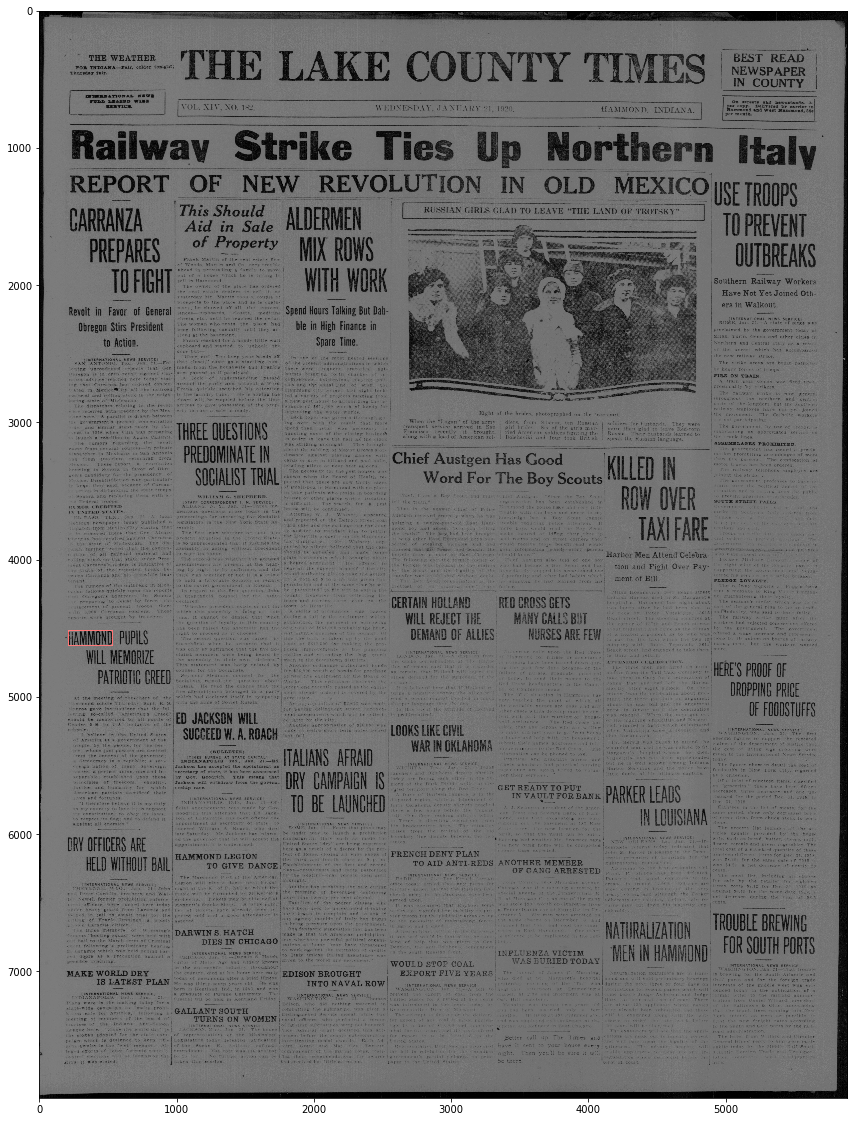

In [65]:
#_idx = 0  # meaningless
#_idx = 22 # Good
#_idx = 23 # Crowded
_idx = 24 # Good


_blocks_conts = blocks_conts[_idx]
_blocks_coord = blocks_coord[_idx]


width,height,vpos,hpos = _blocks_coord
patch = img[vpos:vpos+height,hpos:hpos+width,:]

print("Patch dim:\n\t{}".format(np.shape(patch)))
print("\n")
print("OCR text:")
if(_blocks_conts==''):
    print("\tNo OCR content...")
else:
    print("\t{}".format(_blocks_conts))
    

canvas = np.zeros((image_height,image_width,3), np.uint8)

textBlock = textBlocks[_idx]

width  = int(textBlock.attributes["WIDTH"].value)
height = int(textBlock.attributes["HEIGHT"].value)
vpos = int(textBlock.attributes["VPOS"].value)
hpos = int(textBlock.attributes["HPOS"].value)

cv2.rectangle(canvas,(hpos,vpos),(hpos+width,vpos+height),(255,0,0),30)


img_h,img_w = img.shape[0:2]
new_canvas = cv2.resize(canvas,(int(img_w),int(img_h)))
added_image = cv2.addWeighted(img,0.6,new_canvas,0.8,0)

plt.figure(figsize=(20,20))
plt.imshow(added_image)
plt.show()




In [ ]:
image_patch_0.jpg
image_patch_1.jpg
...



Patch:


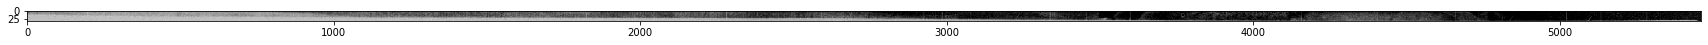

Patch dim:
	(32, 5461, 3)


OCR text:
	' " ' At.-we..' .. tf?-.gt. . . -l. ........ ...ni.f..rnrrf..iri... . tiHrii' lim liiA.i i..iiltoiMg.artii..Mani..iiii. rtii. in " " f " " ("If ill rl I ajW"M"''".J'!afTrft nT' -ffltMW 'iitlMT MMHMiiASiii Mi'i.ttritfii li'TrtiTMiiljJ'.fi". 'i-ft r ""Tru ' 'I fln. .r-oiiinL W ilir.'lliM'-il ,JTlllWmMMMMim'WliraWWiirTT' - .-.r 


In [37]:
# Visualize Mapping

_idx = 0  # meaningless
#_idx = 22 # Good
#_idx = 23 # Crowded
#_idx = 24 # Good


_blocks_conts = blocks_conts[_idx]
_blocks_coord = blocks_coord[_idx]


width,height,vpos,hpos = _blocks_coord
patch = img[vpos:vpos+height,hpos:hpos+width,:]

print("Patch:")
plt.figure(figsize=(30,30))
plt.imshow(patch)
plt.show()

print("Patch dim:\n\t{}".format(np.shape(patch)))
print("\n")
print("OCR text:")
if(_blocks_conts==''):
    print("\tNo OCR content...")
else:
    print("\t{}".format(_blocks_conts))

In [40]:
canvas = np.zeros((image_height,image_width,3), np.uint8)

In [53]:
for textBlock in textBlocks:
    width  = int(textBlock.attributes["WIDTH"].value)
    height = int(textBlock.attributes["HEIGHT"].value)
    vpos = int(textBlock.attributes["VPOS"].value)
    hpos = int(textBlock.attributes["HPOS"].value)

    cv2.rectangle(canvas,(hpos,vpos),(hpos+width,vpos+height),(255,0,0),30)

In [58]:
img_h,img_w = img.shape[0:2]
new_canvas = cv2.resize(canvas,(int(img_w),int(img_h)))
added_image = cv2.addWeighted(img,0.6,new_canvas,0.8,0)


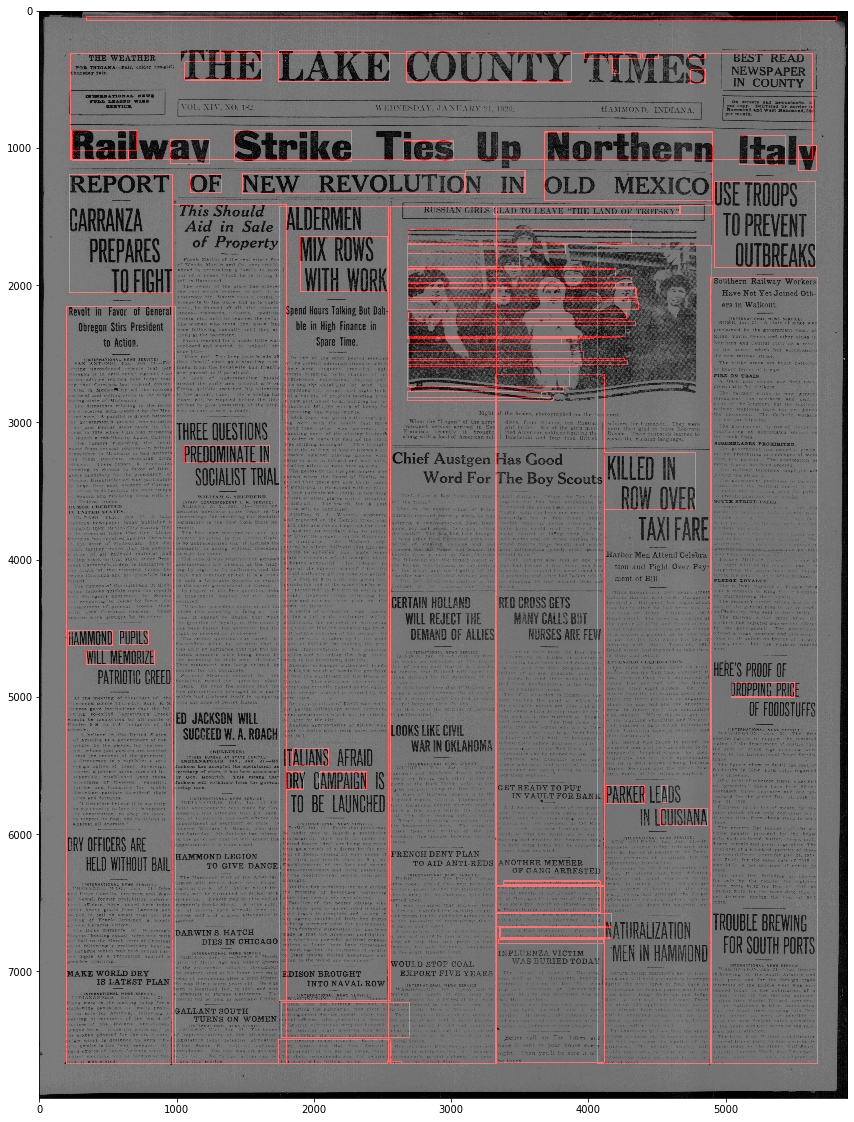

In [59]:
plt.figure(figsize=(20,20))
plt.imshow(added_image)
plt.show()